# Two State Paramagnet

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt # import the "pyplot" library as the "plt" handle
from scipy.special import comb
from scipy.special import perm
import numpy as np # import the "numpy" library as the "np" handle, where lots of functions live
#%matplotlib notebook

mpl.rcParams['figure.figsize'] = (14,10)
mpl.rcParams['font.size'] = 20
mpl.rcParams['legend.fontsize'] = 20

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# general formula for the multiplicity of a two state paramagnet with N spins and M spins up ( and therefore (N-M) spins down)
def Omega(N,M):
    return comb(N,M)

In [3]:

# Probability of getting q spins up given N spins.
def probability(N,q):
    return Omega(N,q)/(2**N)

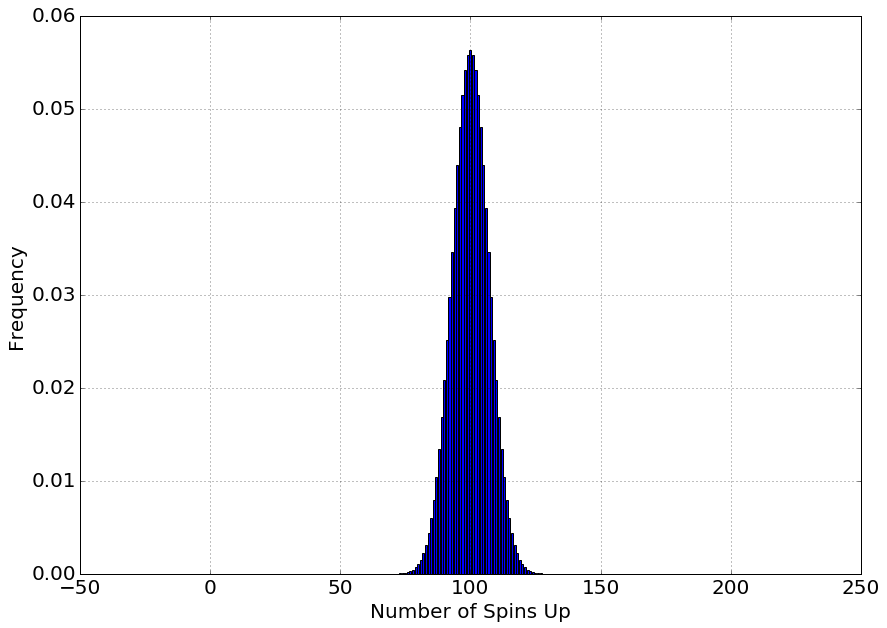

In [4]:
N=200
qArray=np.arange(0,N+1) #there are N+1 macrostates
res=probability(N,qArray)
plt.bar(qArray,res,align='center')
plt.grid()
plt.xlabel('Number of Spins Up')
plt.ylabel('Frequency')
#plt.savefig('twoStateParamagnet.png')
plt.show()

In [5]:
def barPlot(N):
    # there are N+1 possible macrostates
    macrostateArray = np.arange(0,N+1)
    return  plt.bar(macrostateArray,probability(N,macrostateArray),align='center')

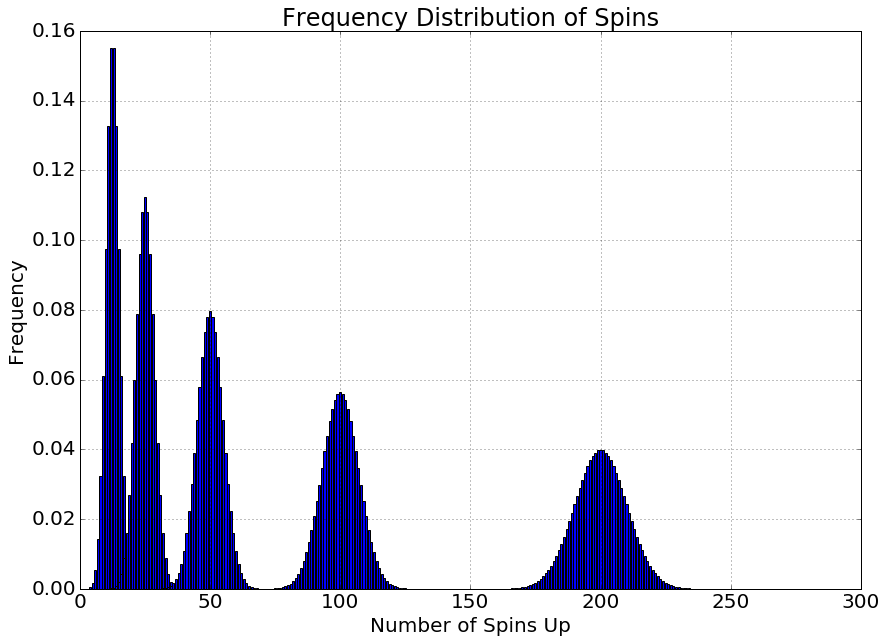

In [6]:
# histogram of frequency distribution as a function of the number of up spins

barPlot(25)
barPlot(50)
barPlot(100)
barPlot(200)
barPlot(400)
plt.grid()
plt.title('Frequency Distribution of Spins')
plt.xlabel('Number of Spins Up')
plt.ylabel('Frequency')
plt.xlim(0,300)
#plt.savefig('twoStateParamagnetAnswer.png')
plt.show() 

In [7]:
def renormalizedBarPlot(N):
    
    spinUpRange=np.arange(0,N,dtype=np.float64)
    
    # fraction of spins up (ranging from 0 to 1)
    renormalizedRange=(spinUpRange)/N
    
    # probability density
    probabilityDensity= N*probability(N,spinUpRange)
    
    # sanity check 
    # the integral of the probability density over the range should be 100% or 1
    print('integral of probability density with',N, 'spins is',  np.trapz(probabilityDensity,renormalizedRange))
    
    #plot the frequency distribution of spins vs fraction of spins up 
    return plt.plot(renormalizedRange,probabilityDensity)

integral of probability density with 25 spins is 0.999999582767
integral of probability density with 50 spins is 1.0
integral of probability density with 100 spins is 0.9999999999999997
integral of probability density with 200 spins is 1.000000000000125
integral of probability density with 400 spins is 1.0000000000000884


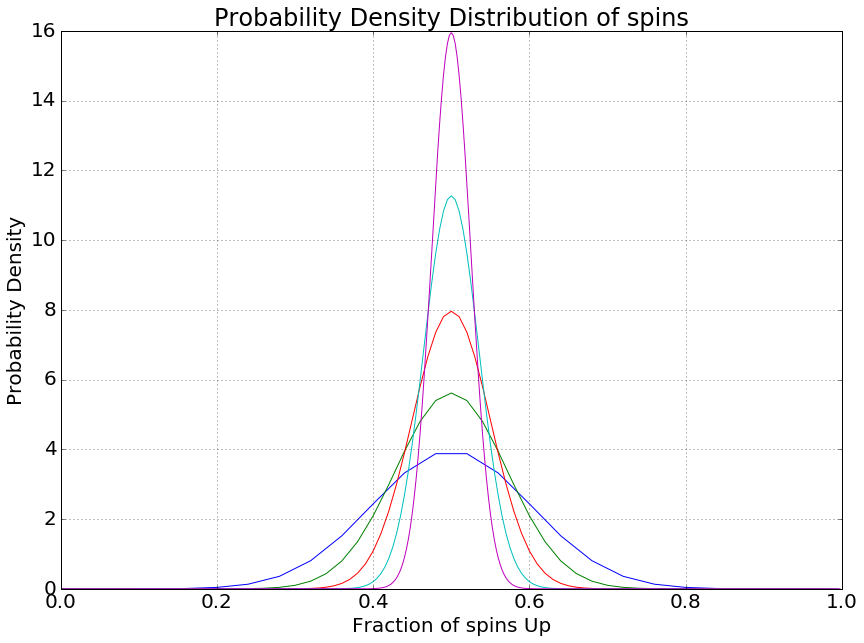

In [8]:
plt.close()
renormalizedBarPlot(25)
renormalizedBarPlot(50)
renormalizedBarPlot(100)
renormalizedBarPlot(200)
renormalizedBarPlot(400)

plt.grid()
plt.title('Probability Density Distribution of spins' )
plt.xlabel('Fraction of spins Up')
plt.ylabel('Probability Density')
#plt.savefig('twoStateParamagnet.png')
plt.show()

## Average and Standard Deviation

$$\langle x \rangle = \sum_i x_i P_i $$

$$ \sigma_x  = \sqrt{ \sum_i (x_i-\langle x \rangle)^2 P_i} $$

In [9]:
# average of a distribution

def spinUpAverage(n): 
    array= np.arange(0,n)
    return np.sum(array*probability(n,array))

# variance

def spinUpVariance(n): 
    array= np.arange(0,n)
    return np.sum((array-spinUpAverage(n))**2*probability(n,array))


def spinUpStandardDeviation(n): 
    return np.sqrt(spinUpVariance(n))


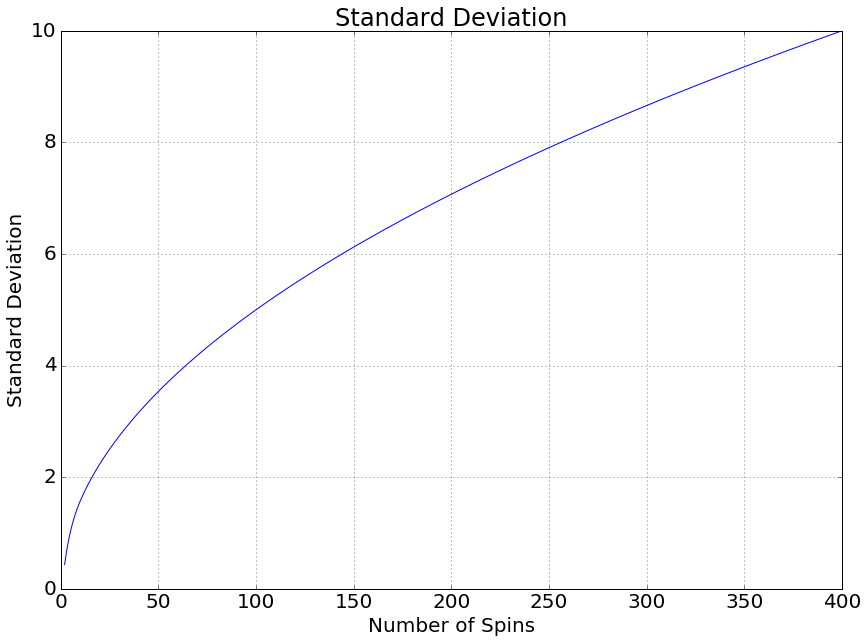

In [10]:
xArray=np.arange(2,400,dtype=np.float64)
arrayStandardDeviation=[spinUpStandardDeviation(m) for m in xArray]
arrayAverage=[spinUpAverage(m) for m in xArray]
plt.plot(xArray,arrayStandardDeviation)
#plt.plot(xArray,arrayAverage)

plt.grid()
plt.title('Standard Deviation' )
plt.xlabel('Number of Spins')
plt.ylabel('Standard Deviation')
plt.ylim([0,10])
plt.savefig('standardDeviation.png')
plt.show()